# Getting Max Over Kernel

In [21]:
# num_list = [3, 4, 5, 1, -44 , 5 ,10, 12 ,33, 1]
num_list = [3 , 4 , 5 , 1 , -44]
k = 3

In [22]:
def getting_max_over_kernel(my_list, k):
    max_list = []

    for i, num in enumerate(my_list):
        if (i + 2) < len(my_list): # traverse the entire list
            max_in_range = max(my_list[i:(i+k)])
            range_with_max = my_list[i:(i+k)]

            # print('max:', max_in_range)
            # print('range:', my_list[i:(i+k)])
            max_list.append(max_in_range)

    return max_list

# getting_max_over_kernel(num_list, 3)
# print(max_list)

In [23]:
num_list = [3, 4, 5, 1, -44 , 5 ,10, 12 ,33, 1]
k = 3
print(getting_max_over_kernel(num_list, k))

[5, 5, 5, 5, 10, 12, 33, 33]


# Character Counting

In [24]:
def count_character(word):
    count_letter = {letter:0 for letter in word}
    for letter in word:
        #? Add 1 when access a key
        count_letter[letter] = count_letter[letter] + 1

    return count_letter


print(count_character("Happiness"))
print(count_character("smiles"))

{'H': 1, 'a': 1, 'p': 2, 'i': 1, 'n': 1, 'e': 1, 's': 2}
{'s': 2, 'm': 1, 'i': 1, 'l': 1, 'e': 1}


In [25]:
with open('P1_data.txt', 'r') as f:
    text = f.read() # all text from file_name
    print(text)

He who conquers himself is the mightiest warrior
Try not to become a man of success but rather become a man of value
One man with courage makes a majority
One secret of success in life is for a man to be ready for his opportunity when it comes
The successful man will profit from his mistakes and try again in a different way
A successful man is one who can lay a firm foundation with the bricks others have thrown at him
Success usually comes to those who are too busy looking for it
We cannot solve problems with the kind of thinking we employed when we came up with them
Just one small positive thought in the morning can change your whole day
You can get everything in life you want if you will just help enough other people get what they want


In [26]:
def remove_special_char(text):
    text = text.replace("'", "").replace('"', "").replace("\n", " ")

    return text.strip(' ')

In [29]:
file_path = 'P1_data.txt'

def count_word(file_name):
    with open(file_name, 'r') as f:
        text = f.read() # all text from file_name
        text = remove_special_char(text)
        word_list = text.split(" ")
        word_dict = {}

        for word in word_list:
            #? add 1 if word already in word_dict
            if word not in word_dict:
                word_dict[word] = 1

            word_dict[word] += 1

        return word_dict

result = count_word(file_path)
print(result)
# assert result["who"] == 3
# print(result["who"])


{'He': 2, 'who': 4, 'conquers': 2, 'himself': 2, 'is': 4, 'the': 5, 'mightiest': 2, 'warrior': 2, 'Try': 2, 'not': 2, 'to': 4, 'become': 3, 'a': 7, 'man': 7, 'of': 5, 'success': 3, 'but': 2, 'rather': 2, 'value': 2, 'One': 3, 'with': 5, 'courage': 2, 'makes': 2, 'majority': 2, 'secret': 2, 'in': 5, 'life': 3, 'for': 4, 'be': 2, 'ready': 2, 'his': 3, 'opportunity': 2, 'when': 3, 'it': 3, 'comes': 3, 'The': 2, 'successful': 3, 'will': 3, 'profit': 2, 'from': 2, 'mistakes': 2, 'and': 2, 'try': 2, 'again': 2, 'different': 2, 'way': 2, 'A': 2, 'one': 3, 'can': 4, 'lay': 2, 'firm': 2, 'foundation': 2, 'bricks': 2, 'others': 2, 'have': 2, 'thrown': 2, 'at': 2, 'him': 2, 'Success': 2, 'usually': 2, 'those': 2, 'are': 2, 'too': 2, 'busy': 2, 'looking': 2, 'We': 2, 'cannot': 2, 'solve': 2, 'problems': 2, 'kind': 2, 'thinking': 2, 'we': 3, 'employed': 2, 'came': 2, 'up': 2, 'them': 2, 'Just': 2, 'small': 2, 'positive': 2, 'thought': 2, 'morning': 2, 'change': 2, 'your': 2, 'whole': 2, 'day': 2, '

## Levenshtein Distance

**Bài toán: Viết chương trình tính khoảng cách chỉnh sửa tối thiểu Levenshtein.** Khoảng cách Levenshtein thể hiện khoảng cách khác biệt giữa 2 chuỗi ký tự. Khoảng cách Levenshtein giữa chuỗi S và chuỗi T là số bước ít nhất biến chuỗi S thành chuỗi T thông qua 3 phép biến đổi là:

* Xóa một ký tự
* Thêm một ký tự
* Thay thế ký tự này bằng ký tự khác

Khoảng cách này được sử dụng trong việc tính toán sự giống và khác nhau giữa 2 chuỗi, như chương trình kiểm tra lỗi chính tả của winword spellchecker. Ví dụ: Khoảng cách Levenshtein giữa 2 chuỗi "kitten" và "sitting" là 3, vì phải dùng ít nhất 3 lần biến đổi. Trong đó:

* kitten -> sitten (thay "k" bằng "s")
* sitten -> sittin (thay "e" bằng "i")
* sittin -> sitting (thêm ký tự "g")

Để hiểu rõ về thuật toán, chúng ta lấy ví dụ, khoảng cách cần tính giữa hai từ source: "yu" và target: "you". Chi phí thực hiện cho các phép biến đổi bao gồm: xóa một ký tự, thêm một ký tự và thay thế ký tự này thành ký tự khác đều là 1 (Nếu 2 ký tự giống nhau thì chi phí thực hiện là 0).
Các bước thực hiện như sau:


**Bước 1:** Xây dựng ma trận lưu trữ có số hàng là M và số cột là N. Trong đó M là số lượng các ký tự trong từ source + 1, N là số lượng các ký tự trong từ target + 1. Với vậy với ví dụ "yu" và "you", ta có ma trận được biểu diễn như hình 1. Ký hiệu "#" đại diện cho chuỗi rỗng. Gọi là ma trận D.

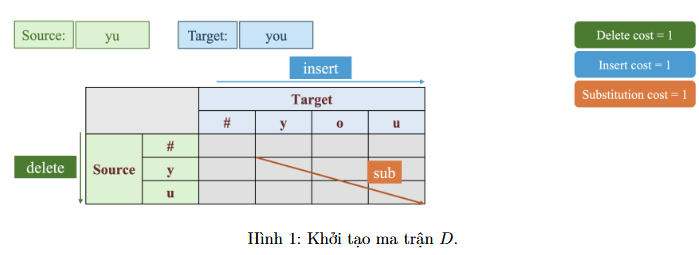

**Hình 1: Khởi tạo ma trận D.**




In [ ]:
"""Algorithm Description
    Levenshtein describe distance between 2 array S and T, the distance is the minimal step
    to convert array S to array T using any of the 3 transformations method:
        + delete a letter
        + add a letter
        + substitution (i.e. replace this letter with another letter) = delete + add
    -> distance = number of time using 1 of the 3 transformation methods above

    This distance calc the similarity between 2 arrays, like windown spelling checker.
    For example, the distance (i.e. minimal step) to convert array "kitten" to "sitting" is 3:
    + kitten -> sitten (replace 'k' with 's')
    + sitten - sitten (replace 'e' with 'i')
    + sitten -> sitting (add letter 'g')
"""


'Algorithm Description\n    Levenshtein describe distance between 2 array S and T, the distance is the minimal step\n    to convert array S to array T using any of the 3 transformations method:\n        + delete a letter\n        + add a letter\n        + replace this letter with another letter\n    -> distance = number of time using 1 of the 3 transformation methods abvoe\n\n    This distance calc the similarity between 2 arrays, like windown spelling checker.\n    For example, the distance (i.e. minimal step) to convert array "kitten" to "sitting" is 3:\n    + kitten -> sitten (replace \'k\' with \'s\')\n    + sitten - sitten (replace \'e\' with \'i\')\n    + sitten -> sitting (add letter \'g\')\n'

In [37]:
D = {
    0:[0,1,2,3],
    1:[0,1,2,3],
    2:[0,1,2,3],
}

print(D[0][1])
src = [[] for i in "you"]
print(src)

1
[[], [], []]


In [71]:
target = [letter for letter in "yu"]
source = [letter for letter in "you"]
print(0 if source[0] == target[0] else 1)

0


In [108]:
def levenshtein_distance(source, target):
    """_summary_

    Args:
        source (str): string array word
        target (str): string array word
    """
    #? Khai báo 2 hàng
    M = len(source)
    N = len(target)

    #? Xác định 2 ký tự giống nhau tại i, j hay không
    source = [letter for letter in f"#{source}"] #? i
    target = [letter for letter in f"#{target}"] #? j
    D_matrix= [[0] * (N+1) for _ in range(M+1)]

    #? Initialize 1st row and 1st column
    for i in range(M+1):
        D_matrix[i][0] = i

    for j in range(N+1):
        D_matrix[0][j] = j

    minimal_step = []
    #? đối với mỗi ô, tính cost tại tọa độ của 3 biến đổi
    for i in range(1, M+1):
        for j in range(1, N+1):
            # print(f"compare distance: {source[i]}[{i}], {target[j]}[{j}]")
            cost = 0 if source[i] == target[j] else 1

            D_matrix[i][j] = min(
                D_matrix[i-1][j] + 1,
                D_matrix[i][j-1] + 1,
                D_matrix[i-1][j-1] + cost # check if letter in source the same as letter in target
            )

            min_value = D_matrix[i][j]
            minimal_step.append(min_value)
            # print('result:', a, b, c, '-> min:', D_matrix[i][j])

    print(D_matrix)

    return D_matrix[M][N]

S = "yu"
T = "you"
distant = levenshtein_distance(S, T)
print('D Matrix:\n', distant)

[[0, 1, 2, 3], [1, 0, 1, 2], [2, 1, 1, 1]]
D Matrix:
 1


In [109]:
source_word_2 = "kitten"
target_word_2 = "sitting"
distance_2 = levenshtein_distance(source_word_2, target_word_2)
print(f"Levenshtein distance between '{source_word_2}' and '{target_word_2}': {distance_2}") # Output: 3

[[0, 1, 2, 3, 4, 5, 6, 7], [1, 1, 2, 3, 4, 5, 6, 7], [2, 2, 1, 2, 3, 4, 5, 6], [3, 3, 2, 1, 2, 3, 4, 5], [4, 4, 3, 2, 1, 2, 3, 4], [5, 5, 4, 3, 2, 2, 3, 4], [6, 6, 5, 4, 3, 3, 2, 3]]
Levenshtein distance between 'kitten' and 'sitting': 3


**Bước 2:** Hoàn thiện hàng và cột đầu tiên. Với hàng đầu tiên, các giá trị đại diện cho chuỗi bắt đầu là chuỗi "#" và phép biến đổi là thêm (insert) từ chuỗi "#" thành "#y", "#yu".
Các giá trị đại diện cho chuỗi "#", "#y" và phép biến đổi là xoá (delete) để thành chuỗi "#", "#y", "#yu" lần lượt là: 0, 1, 2 tương ứng với D[0,0], D[1,0], D[2,0]. Ta được hình 2.

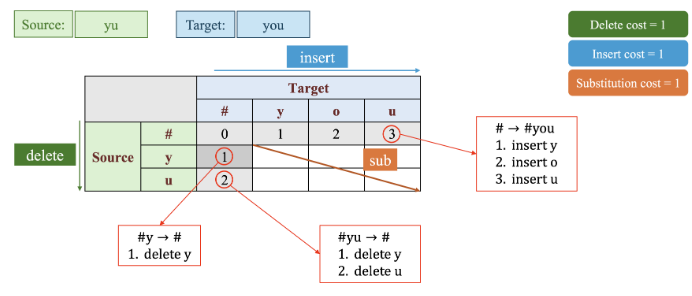

**Hình 2: Số phép biến đổi cho hàng đầu tiên (thêm) và cột đầu tiên (xoá).**

**Bước 3:** Tính toán các giá trị với các ô còn lại trong ma trận. Bắt đầu từ D[1,1] được tính dựa vào 3 ô phía trước là D[0,1], D[1,0], D[0,0] như sau:

$$D[1,1] = \min \begin{cases} D[0,1] + \text{del\_cost}(\text{source}[1]) = 1 + 1 = 2 \\ D[1,0] + \text{ins\_cost}(\text{target}[1]) = 1 + 1 = 2 \\ D[0,0] + \text{sub\_cost}(\text{source}[1], \text{target}[1]) = 0 + 0 = 0 \end{cases}$$

Vậy D[1,1] = 0 ta được ma trận D như sau:

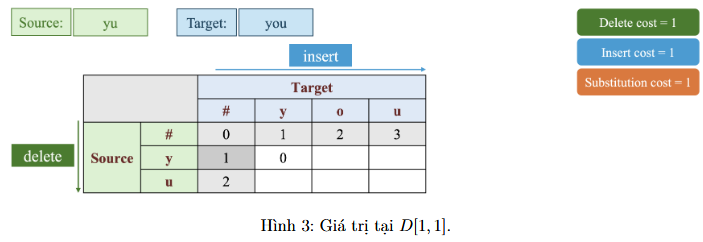

**Hình 3: Giá trị tại D[1,1].**

Tiếp theo chúng ta tính D[2,1], D[1,2]:

$$D[2,1] = \min \begin{cases} D[1,1] + \text{del\_cost}(\text{source}[2]) = 0 + 1 = 1 \\ D[2,0] + \text{ins\_cost}(\text{target}[1]) = 2 + 1 = 3 \\ D[1,0] + \text{sub\_cost}(\text{source}[2], \text{target}[1]) = 1 + 1 = 2 \end{cases}$$

$$D[1,2] = \min \begin{cases} D[0,2] + \text{del\_cost}(\text{source}[1]) = 2 + 1 = 3 \\ D[1,1] + \text{ins\_cost}(\text{target}[2]) = 0 + 1 = 1 \\ D[0,1] + \text{sub\_cost}(\text{source}[1], \text{target}[2]) = 1 + 1 = 2 \end{cases}$$

Vì vậy D[2,1] = 1, D[1,2] = 1 ta được ma trận D như sau:

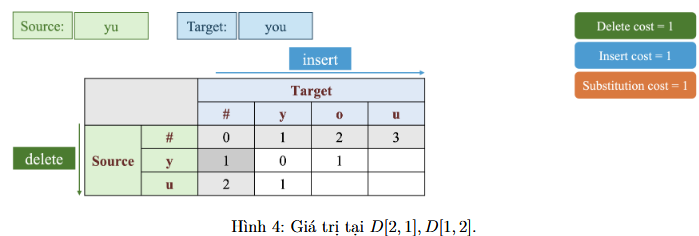

**Hình 4: Giá trị tại D[2,1], D[1,2].**

Cuối cùng, chúng ta tính D[1,3], D[2,2], D[2,3]:

$$D[1,3] = \min \begin{cases} D[0,3] + \text{del\_cost}(\text{source}[1]) = 3 + 1 = 4 \\ D[1,2] + \text{ins\_cost}(\text{target}[3]) = 1 + 1 = 2 \\ D[0,2] + \text{sub\_cost}(\text{source}[1], \text{target}[3]) = 2 + 1 = 3 \end{cases}$$

$$D[2,2] = \min \begin{cases} D[1,2] + \text{del\_cost}(\text{source}[2]) = 1 + 1 = 2 \\ D[2,1] + \text{ins\_cost}(\text{target}[2]) = 1 + 0 = 1 \\ D[1,1] + \text{sub\_cost}(\text{source}[2], \text{target}[2]) = 0 + 1 = 1 \end{cases}$$

$$D[2,3] = \min \begin{cases} D[1,3] + \text{del\_cost}(\text{source}[2]) = 2 + 1 = 3 \\ D[2,2] + \text{ins\_cost}(\text{target}[3]) = 1 + 1 = 2 \\ D[1,2] + \text{sub\_cost}(\text{source}[2], \text{target}[3]) = 1 + 0 = 1 \end{cases}$$

Vì vậy D[1,3] = 2, D[2,2] = 1, D[2,3] = 1 ta được ma trận như sau:

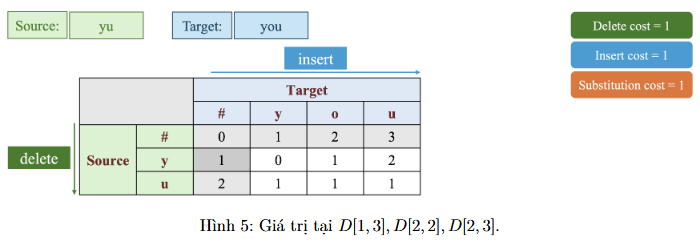

**Hình 5: Giá trị tại D[1,3], D[2,2], D[2,3].**


**Bước 4:** Sau khi hoàn thành ma trận, chúng ta đi tìm đường đi từ ô cuối cùng D[2,3] có giá trị là 1. Vì vậy khoảng cách chỉnh sửa từ source: "yu" sang thành target: "you" là 1. Đầu tiên ký tự "y" giữ nguyên sau đó thực hiện 1 phép thêm ký tự "o" vào sau ký tự "y" và cuối cùng ký tự "u" được giữ nguyên. Minh hoạ các bước quay lui để tìm đường đi ngắn nhất tương ứng mũi tên vàng trong hình sau:

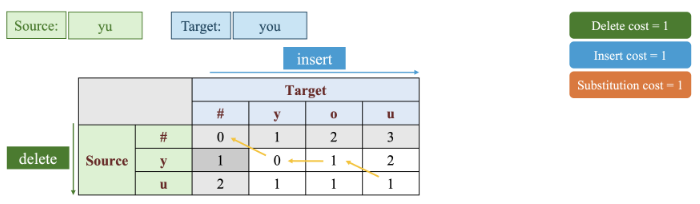

**Hình 6: Quay lui, tìm các bước thực hiện chỉnh sửa từ source "y" sang target: "you".**